In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
file_path = "src/cars.csv"
data = pd.read_csv(file_path)

<h1>Описание набора данных</h1>
<br></br>
<ul>
    <li><a href="https://www.kaggle.com/datasets/doaaalsenani/usa-cers-dataset">Источник </a> </li>
    <li>Набор данных состоит из 1 файла cars.csv.</li>
    <li>Данный набор содержит информацию о подержанных и новых автомобилях, выставленных на продажу в США. Данные были собраны с аукционного сайта AUCTION EXPORT.com и включают сведения о 28 автомобильных брендах. Для каждого автомобиля в наборе представлено 12 характеристик, таких как цена, пробег, год выпуска и техническое состояние. Набор позволяет анализировать рынок автомобилей, сравнивать стоимость марок и моделей, а также изучать зависимость цены от параметров вроде пробега или региона продажи.</li>
</ul>

<ul>
  <li><strong>Price</strong> - Integer - The sale price of the vehicle in the ad</li>
  <li><strong>Years</strong> - Integer - The vehicle registration year</li>
  <li><strong>Brand</strong> - String - The brand of car</li>
  <li><strong>Model</strong> - String - model of the vehicle</li>
  <li><strong>Color</strong> - String - Color of the vehicle</li>
  <li><strong>State/City</strong> - String - The location in which the car is being available for purchase</li>
  <li><strong>Mileage</strong> - Float - miles traveled by vehicle</li>
  <li><strong>Vin</strong> - String - The vehicle identification number is a collection of 17 characters (digits and capital letters)</li>
  <li><strong>Title Status</strong> - String - This feature included binary classification, which are clean title vehicles and salvage insurance</li>
  <li><strong>Lot</strong> - Integer - A lot number is an identification number assigned to a particular quantity or lot of material from a single manufacturer. For cars, a lot number is combined with a serial number to form the Vehicle Identification Number.</li>
  <li><strong>Condition</strong> - String - Time</li>
</ul>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


In [9]:
data.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [12]:
#трансформация данных
data=data.drop("model",axis=1)
data['country'] = data['country'].astype(str)
data= data.drop("vin",axis=1)
data= data.drop("lot",axis=1)
data=data.drop("country",axis=1)
data['title_status'] = data['title_status'].astype(str)
data['condition'] = data['condition'].astype(str)
data['color'] = data['color'].astype(str)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   state         2499 non-null   object 
 8   condition     2499 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 175.8+ KB


In [15]:
data['status_b'] = data['title_status'].apply(lambda x: 1 if x == 'clean vehicle' else 0)


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   state         2499 non-null   object 
 8   condition     2499 non-null   object 
 9   status_b      2499 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 195.4+ KB


<h1> ЗАДАНИЕ 1 </h1>
Задача №3.
Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "weight of evidence (WoE) encoding".

In [21]:
woe_table = data.groupby('brand')['status_b'].agg(['count', 'sum'])
woe_table.columns = ['total', 'good']  # 'sum' = количество Good (1)
woe_table['bad'] = woe_table['total'] - woe_table['good']  # количество Bad (0)


total_good = woe_table['good'].sum()
total_bad = woe_table['bad'].sum()

woe_table['woe'] = np.log(
    (woe_table['good'] / total_good) / (woe_table['bad'] / total_bad)
)

data['brand_woe'] = data['brand'].map(woe_table['woe'])

C:\Users\Necron\Desktop\code\ml\env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [22]:
data

,Unnamed: 0,price,brand,year,title_status,mileage,color,state,condition,status_b,brand_woe
0,0,6300,toyota,2008,clean vehicle,274117.0,black,new jersey,10 days left,1,inf
1,1,2899,ford,2011,clean vehicle,190552.0,silver,tennessee,6 days left,1,0.104993
2,2,5350,dodge,2018,clean vehicle,39590.0,silver,georgia,2 days left,1,0.473049
3,3,25000,ford,2014,clean vehicle,64146.0,blue,virginia,22 hours left,1,0.104993
4,4,27700,chevrolet,2018,clean vehicle,6654.0,red,florida,22 hours left,1,-0.318423
...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,2019,clean vehicle,23609.0,red,california,1 days left,1,-0.033644
2495,2495,9200,nissan,2018,clean vehicle,34553.0,silver,florida,21 hours left,1,-0.033644
2496,2496,9200,nissan,2018,clean vehicle,31594.0,silver,florida,21 hours left,1,-0.033644
2497,2497,9200,nissan,2018,clean vehicle,32557.0,black,florida,2 days left,1,-0.033644


<h1> ЗАДАНИЕ 2 </h1>
Задача №23.
Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе правила трех сигм.

{'whiskers': [<matplotlib.lines.Line2D at 0x1ed76884710>,
 'caps': [<matplotlib.lines.Line2D at 0x1ed76895790>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ed7688c7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ed76896a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ed76897290>],
 'means': []}

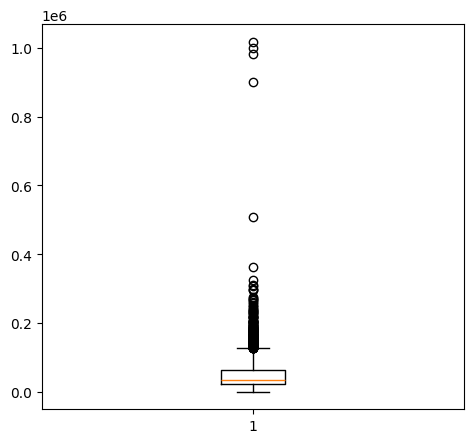

In [25]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.boxplot(data['mileage'])

In [30]:
mu = data['mileage'].mean()
sigma = data['mileage'].std()

lower_bound = mu - 3 * sigma
upper_bound = mu + 3 * sigma

outliers = data[(data['mileage'] < lower_bound) | (data['mileage'] > upper_bound)]
print(len(outliers))
outliers


28


,Unnamed: 0,price,brand,year,title_status,mileage,color,state,condition,status_b,brand_woe
0,0,6300,toyota,2008,clean vehicle,274117.0,black,new jersey,10 days left,1,inf
182,182,3800,chevrolet,2009,clean vehicle,261648.0,white,michigan,2 days left,1,-0.318423
197,197,15700,ford,2011,clean vehicle,309564.0,white,south carolina,21 hours left,1,0.104993
293,293,0,chevrolet,1998,salvage insurance,258631.0,gray,texas,17 hours left,0,-0.318423
305,305,0,ford,2003,salvage insurance,246065.0,gold,kansas,8 days left,0,0.104993
311,311,7320,chevrolet,2008,clean vehicle,325611.0,silver,florida,22 hours left,1,-0.318423
330,330,0,ford,1996,salvage insurance,296860.0,green,california,19 hours left,0,0.104993
340,340,350,ford,2004,salvage insurance,236980.0,gray,illinois,17 hours left,0,0.104993
347,347,0,gmc,2004,salvage insurance,235348.0,gold,south carolina,2 days left,0,-0.660965
367,367,2725,chevrolet,2004,salvage insurance,308451.0,black,south carolina,2 days left,0,-0.318423


In [31]:
data_upd = data[(data['mileage'] >= lower_bound) & (data['mileage'] <= upper_bound)]

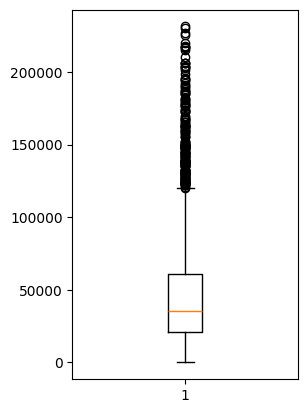

In [32]:

# Визуализация после обработки
plt.subplot(1, 2, 2)
plt.boxplot(data_upd['mileage'])
plt.show()

<h1>Дополнительное задание</h1>
Для студентов группы ИУ5-25М, ИУ5И-25М, ИУ5-25МВ - для произвольной колонки данных построить парные диаграммы (pairplot).

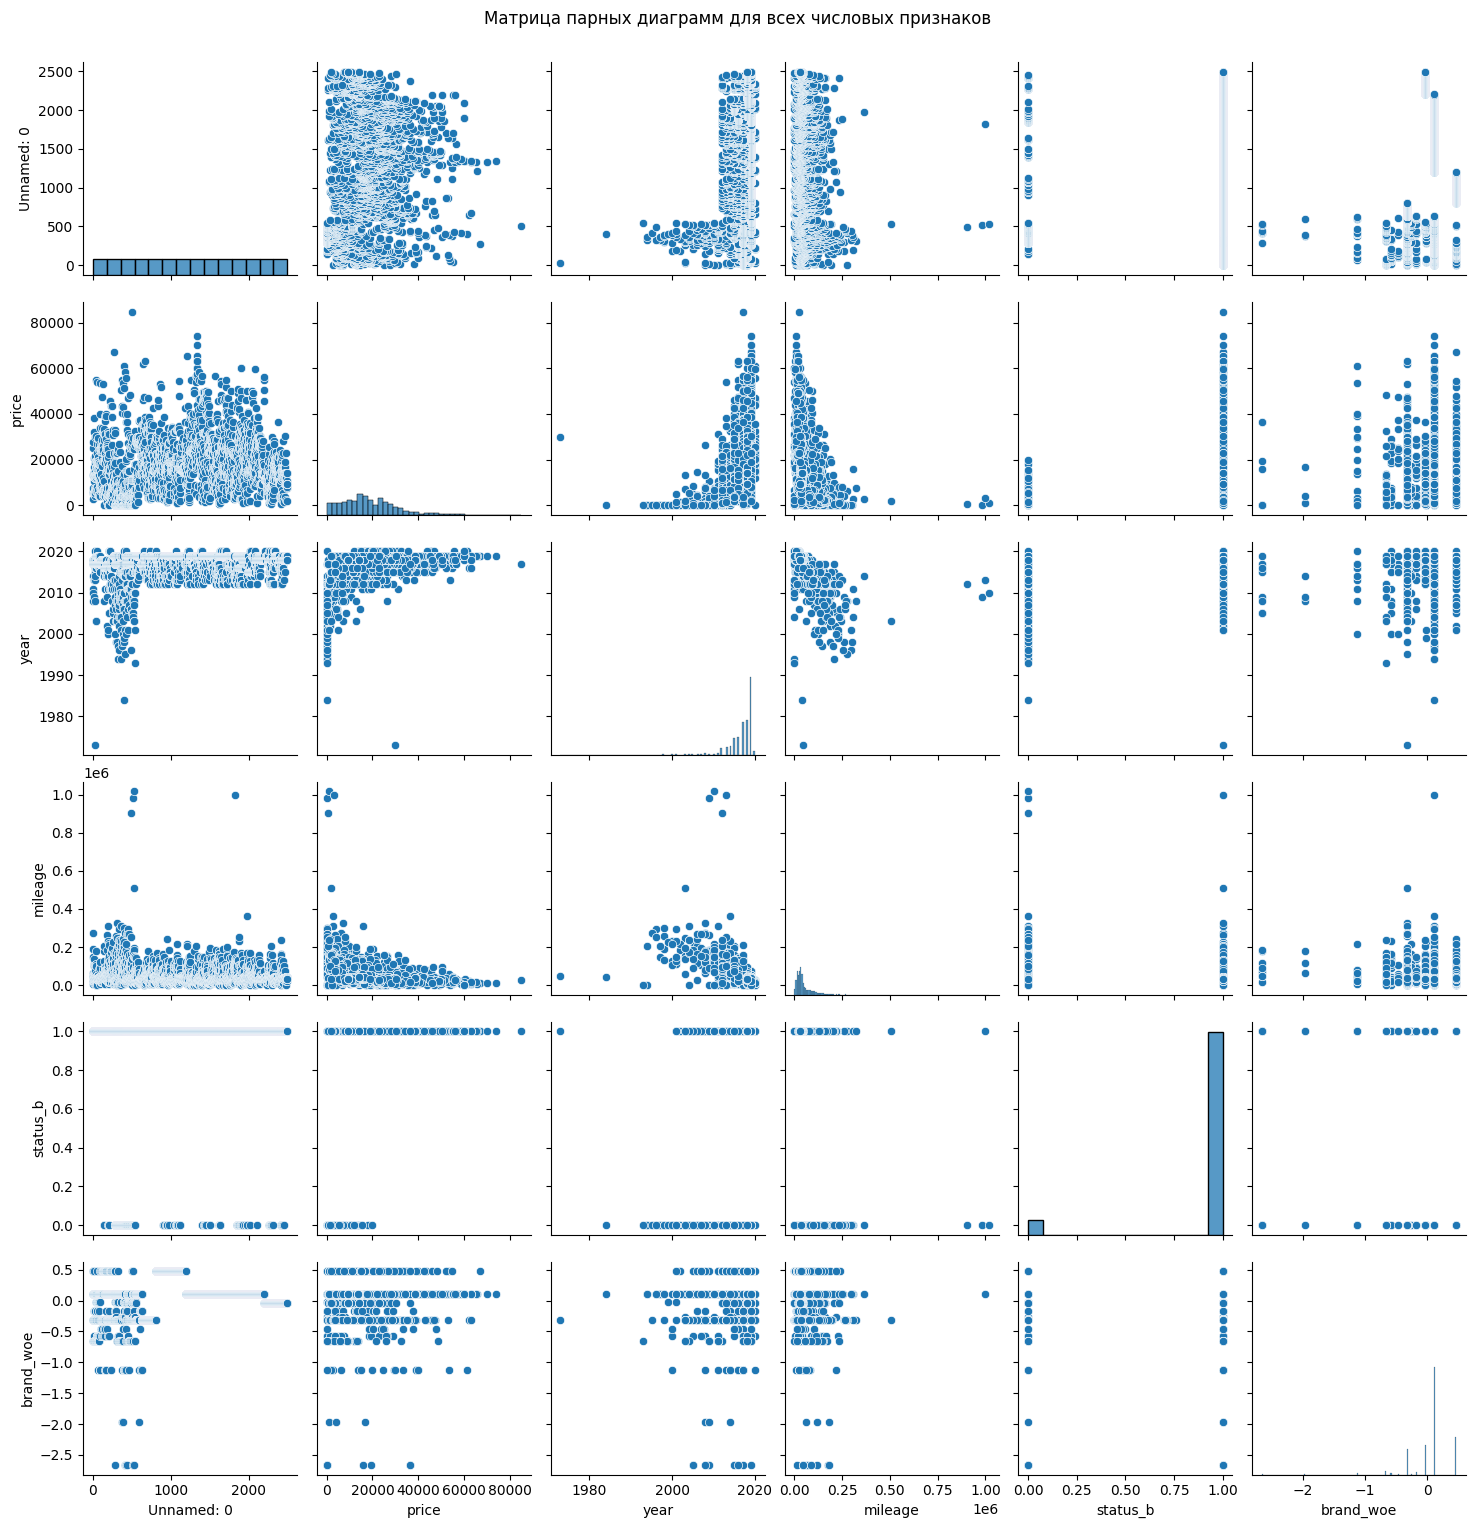

In [33]:
sns.pairplot(data)
plt.suptitle('Матрица парных диаграмм для всех числовых признаков', y=1.02)
plt.show()